### Importing Required Libraries

The following libraries are imported to facilitate data manipulation, model training, and evaluation:

- `pandas`: For handling data in DataFrame format.
- `numpy`: For numerical computations and array manipulation.
- `matplotlib.pyplot`: For visualizing data through plots.
- `seaborn`: For enhanced data visualization.
- `sklearn.model_selection`: For splitting data into training and testing sets, and performing cross-validation.
- `sklearn.preprocessing`: For scaling numerical features.
- `sklearn.ensemble`: For implementing the Random Forest classifier.
- `sklearn.svm`: For implementing the Support Vector Classifier.
- `sklearn.metrics`: For evaluating model performance with accuracy, confusion matrix, and classification report.
- `kagglehub`: For interacting with Kaggle datasets (if required).
- `os`: For interacting with the operating system (e.g., file handling).

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import kagglehub
import os


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import kagglehub
import os

# Loading and Exploring the Iris Flower Dataset

In [2]:
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris-flower-dataset


In [3]:
directory_path = "/kaggle/input/iris-flower-dataset"
files = os.listdir(directory_path)

print("Files in dataset directory:")
for f in files:
    print(f)


Files in dataset directory:
IRIS.csv


In [4]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Dataset Overview

The Iris dataset consists of 150 entries and 5 columns:

- **sepal_length**, **sepal_width**, **petal_length**, **petal_width**: Numerical features (float64).
- **species**: Categorical target variable (object).

All columns have 150 non-null entries, and the dataset uses approximately 6.0 KB of memory.


In [7]:
# Get dataset shape
print("Dataset shape:", df.shape)

Dataset shape: (150, 5)



Class distribution:


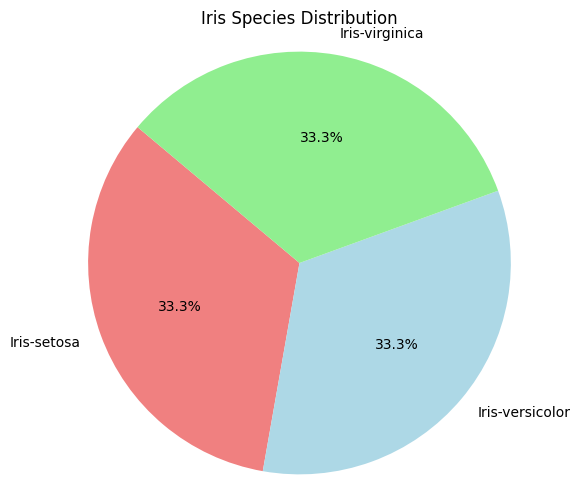

In [8]:
print("\nClass distribution:")

# Class counts
class_counts = df['species'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title("Iris Species Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


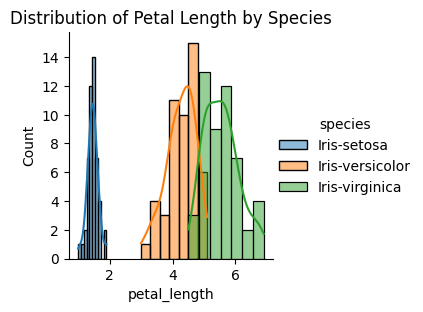

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


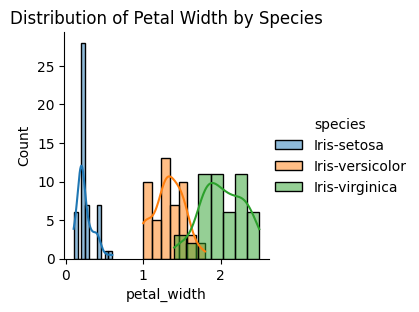

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


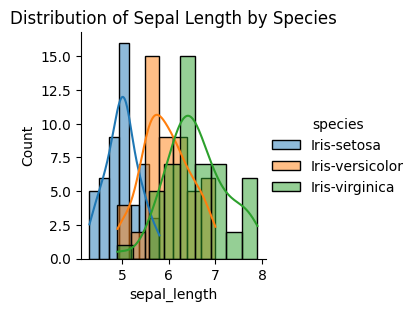

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for petal_length
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "petal_length", kde=True).add_legend()
plt.title("Distribution of Petal Length by Species")
plt.show()

# Plot for petal_width
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "petal_width", kde=True).add_legend()
plt.title("Distribution of Petal Width by Species")
plt.show()

# Plot for sepal_length
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "sepal_length", kde=True).add_legend()
plt.title("Distribution of Sepal Length by Species")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` 

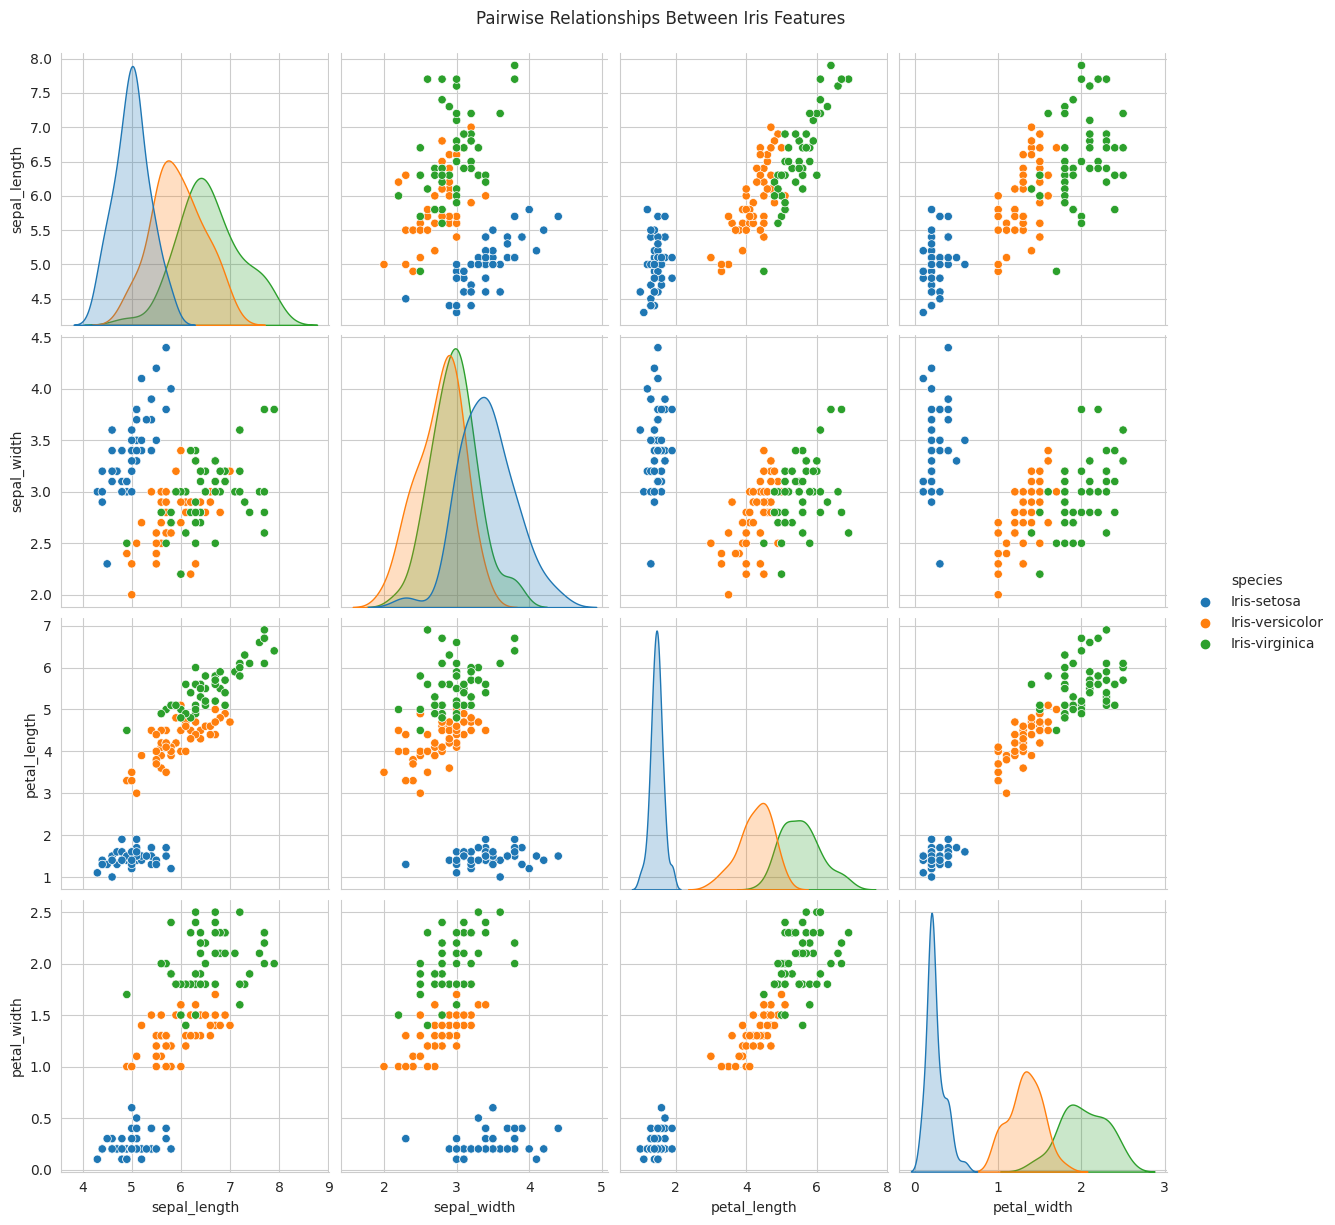

In [10]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.suptitle("Pairwise Relationships Between Iris Features", y=1.02)
plt.show()

In [11]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['species'])
y = df['species']

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)


Random Forest Accuracy: 1.0

Random Forest Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



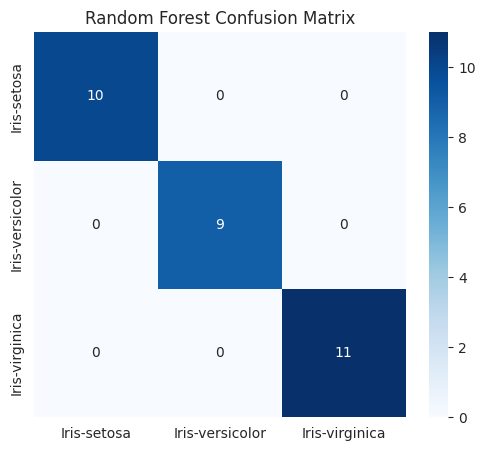

In [14]:
# Random Forest accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Random Forest classification report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Random Forest confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues", xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title('Random Forest Confusion Matrix')
plt.show()


Text(0.5, 1.0, 'Feature Importance')

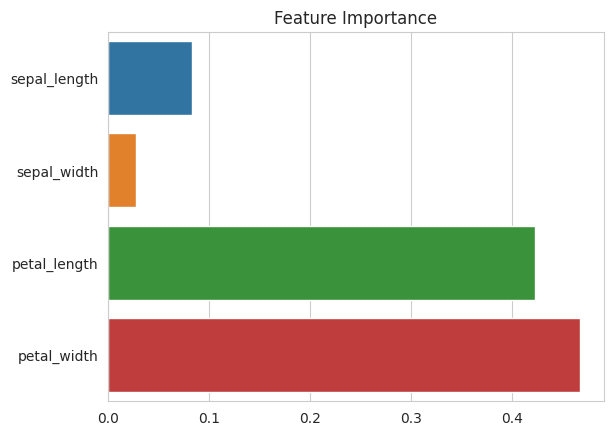

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")

In [16]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_pred = svm_model.predict(X_test)


SVM Accuracy: 0.9666666666666667

SVM Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



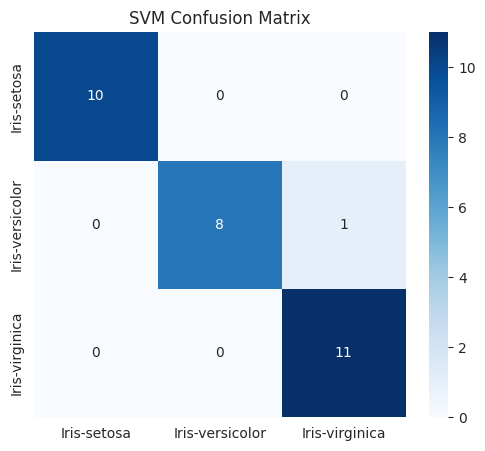

In [17]:
# SVM accuracy
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# SVM classification report
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))

# SVM confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt="d", cmap="Blues", xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title('SVM Confusion Matrix')
plt.show()


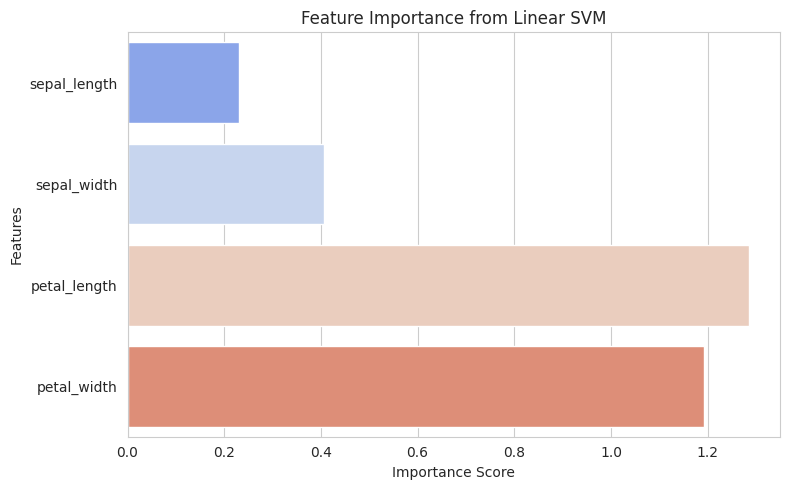

In [18]:
from sklearn.svm import SVC

# Train a linear SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Get absolute values of coefficients as feature importance
coefficients = np.abs(svm_model.coef_).mean(axis=0)  # Average for multiclass
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients, y=feature_names, palette="coolwarm")
plt.title("Feature Importance from Linear SVM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### Summary and Conclusion:

1. **Random Forest Model:**
   - **Accuracy:** The Random Forest model achieved a perfect accuracy of **1.0**, indicating that it correctly predicted the class for every data point in the test set.
   - **Classification Report:** 
     - The **precision**, **recall**, and **f1-score** for all three classes (Iris-setosa, Iris-versicolor, and Iris-virginica) are **1.00**, meaning that the model made no mistakes in predicting the class labels for any sample.
     - The model is performing excellently across all metrics, with no misclassifications, and the support for each class is relatively balanced.

2. **Support Vector Machine (SVM) Model:**
   - **Accuracy:** The SVM model performed very well with an accuracy of approximately **0.97** (96.67%), which is slightly lower than the Random Forest model but still quite good.
   - **Classification Report:**
     - The precision, recall, and f1-scores for **Iris-setosa** and **Iris-versicolor** are near perfect, with values of **1.00** and **0.89** for recall of Iris-versicolor. 
     - The **Iris-virginica** class achieved slightly lower precision at **0.92**, but the recall is perfect at **1.00**, resulting in a high **f1-score** of **0.96**.
     - Overall, the SVM model performs excellently, though it shows some minor room for improvement in handling the Iris-versicolor and Iris-virginica classes.

### Conclusion:
- **Random Forest** outperforms the SVM model slightly, achieving perfect accuracy and flawless metrics across all classes.
- **SVM** is a very strong competitor but shows a slightly lower performance, particularly in precision for the **Iris-virginica** class. However, it still maintains very high accuracy and excellent classification performance.

Both models are highly effective for this classification task, with Random Forest showing a slight edge in overall performance, especially in terms of perfect classification accuracy.